In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Info LRP

In [2]:
lrp=pd.read_csv('infrastructure/Roads_InfoAboutEachLRP.csv', low_memory=False)
lrp.head()

,road,chainage,lrp,lat,lon,type,name
0,N1,0.000,LRPS,23.706028,90.443333,Others,Start of Road after Jatrabari Flyover infront...
1,N1,0.814,LRPSa,23.702917,90.450417,Culvert,Box Culvert
2,N1,0.822,LRPSb,23.702778,90.450472,CrossRoad,Intersection with Z1101
3,N1,1.000,LRP001,23.702139,90.451972,KmPost,Km post missing
4,N1,2.000,LRP002,23.697889,90.460583,KmPost,Km post missing


# Road

In [3]:
road=pd.read_csv('infrastructure/_roads.tsv', sep='\t', low_memory=False)
road.tail()

,road,lrp1,lat1,lon1,lrp2,lat2,lon2,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 4035,Unnamed: 4036,Unnamed: 4037,Unnamed: 4038,Unnamed: 4039,Unnamed: 4040,Unnamed: 4041,Unnamed: 4042,Unnamed: 4043,Unnamed: 4044
880,Z8910,LRPS,22.674722,90.408889,LRPSa,22.675916,90.412556,LRP001,22.675583,90.417166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,Z8913,LRPS,22.396083,90.688666,LRPSa,22.393027,90.688944,LRPSb,22.392666,90.689083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,Z8915,LRPS,22.589389,90.619472,LRP001,22.589694,90.623360,LRP001a,22.590027,90.631360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,Z8916,LRPS,22.625499,90.661722,LRPSa,22.623888,90.664167,LRP001,22.620305,90.668999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,Z8943,LRPS,22.426444,90.849472,LRPSa,22.426416,90.846833,LRP001,22.425444,90.839861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataframe reshape, harversine and plot function

In [4]:
def reshape_by_position(df):
    
    # First column assumed to be road
    road_col = df.columns[0]
    
    # Remaining columns
    value_cols = df.columns[1:]
    
    # Ensure total remaining columns divisible by 3
    if len(value_cols) % 3 != 0:
        print("Warning: columns not perfectly divisible by 3")
    
    n_groups = len(value_cols) // 3
    
    long_frames = []
    
    for i in range(n_groups):
        lrp_col = value_cols[i*3]
        lat_col = value_cols[i*3 + 1]
        lon_col = value_cols[i*3 + 2]
        
        temp = pd.DataFrame({
            "road": df[road_col],
            "lrp": df[lrp_col],
            "lat": df[lat_col],
            "lon": df[lon_col],
        })
        
        long_frames.append(temp)
    
    tidy_df = pd.concat(long_frames, ignore_index=True)
    
    # Remove rows where LRP or lat/lon is missing
    tidy_df = tidy_df.dropna(subset=["lrp", "lat", "lon"])
    
    return tidy_df

In [5]:
def plot_road(df, title="Road Plot", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(df["lon"], df["lat"], marker="o", markersize=2)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(title)

    return ax

In [6]:
def plot_road_with_labels(df, title="Road Plot", road_name=None):

    d = df.copy()

    if road_name is not None and "road" in d.columns:
        d = d[d["road"] == road_name].copy()

    plt.figure(figsize=(10, 7))

    # Plot line
    plt.plot(d["lon"], d["lat"], marker="o", linestyle="-", markersize=3)

    # Add LRP labels
    for _, row in d.iterrows():
        plt.text(
            row["lon"],
            row["lat"],
            str(row["lrp"]),
            fontsize=8,
            ha="left",
            va="bottom"
        )

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [14]:
EARTH_RADIUS_M = 6371008.8

def haversine_m(lat1, lon1, lat2, lon2):
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return EARTH_RADIUS_M * c

## Data processing

In [7]:
road1=road.loc[road['road']=='N1']
road1.head()
tidy_df = reshape_by_position(road1)
tidy_df.head()

,road,lrp,lat,lon
0,N1,LRPS,23.706028,90.443333
1,N1,LRPSa,23.702917,90.450417
2,N1,LRPSb,23.702778,90.450472
3,N1,LRP001,23.702139,90.451972
4,N1,LRP002,23.697889,90.460583


<Axes: title={'center': 'N1'}, xlabel='Longitude', ylabel='Latitude'>

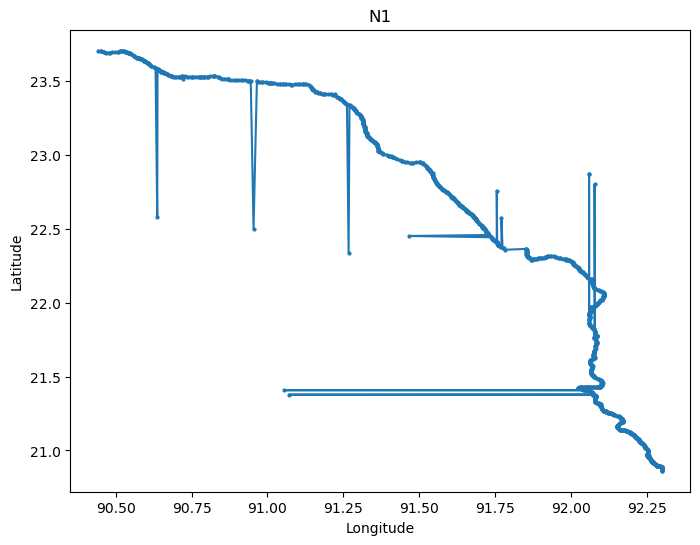

In [8]:
plot_road(tidy_df, title=tidy_df['road'][0])

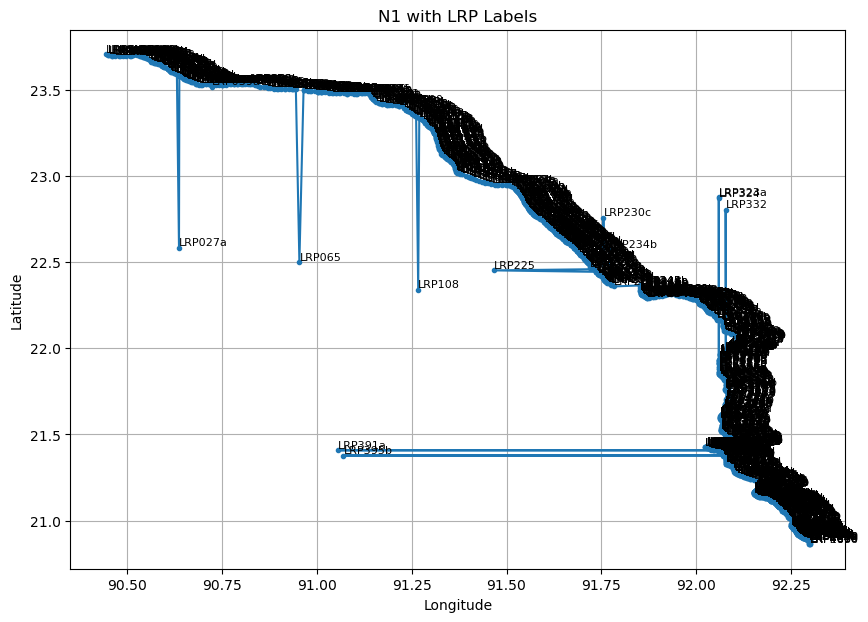

In [9]:
plot_road_with_labels(tidy_df, title="N1 with LRP Labels", road_name="N1")

In [10]:
tidy_df.describe()

,lat,lon
count,1348.000000,1348.000000
mean,22.210546,91.738093
std,0.895552,0.506570
min,20.862917,90.443333
25%,21.383632,91.374687
50%,22.212375,92.027652
75%,22.997764,92.094923
max,23.706083,92.299639


## Data Correction

### Function to correct one point of outlier

In [11]:
def project_point_to_segment(latA, lonA, latB, lonB, latP, lonP):
    # treat lon as X, lat as Y
    Ax, Ay = lonA, latA
    Bx, By = lonB, latB
    Px, Py = lonP, latP

    ABx = Bx - Ax
    ABy = By - Ay
    APx = Px - Ax
    APy = Py - Ay

    AB_len2 = ABx*ABx + ABy*ABy
    if AB_len2 == 0:
        # A and B are same point
        return latA, lonA

    t = (APx*ABx + APy*ABy) / AB_len2

    # clamp to segment
    t = max(0, min(1, t))

    proj_x = Ax + t * ABx
    proj_y = Ay + t * ABy

    # return as lat, lon
    return proj_y, proj_x

In [12]:
def correct_lrp_position(df, lrp_name):

    d = df.copy().reset_index(drop=True)

    # locate the row
    idx_list = d.index[d["lrp"] == lrp_name].tolist()
    if len(idx_list) == 0:
        raise ValueError("LRP not found")

    idx = idx_list[0]

    # ensure not first/last point
    #if idx == 0 or idx == len(d) - 1:
     #   raise ValueError("Cannot correct first or last LRP (no two neighbors)")

    prev_row = d.loc[idx - 1]
    curr_row = d.loc[idx]
    next_row = d.loc[idx + 1]

    # ensure same road
    #if not (prev_row["road"] == curr_row["road"] == next_row["road"]):
     #   raise ValueError("Neighbors belong to different road")

    # projection
    new_lat, new_lon = project_point_to_segment(
        prev_row["lat"], prev_row["lon"],
        next_row["lat"], next_row["lon"],
        curr_row["lat"], curr_row["lon"]
    )

    # distance moved
    move_dist = haversine_m(
        curr_row["lat"], curr_row["lon"],
        new_lat, new_lon
    )

    # update dataframe
    d.at[idx, "lat"] = new_lat
    d.at[idx, "lon"] = new_lon

    # log
    log = {
        "road": curr_row["road"],
        "lrp": curr_row["lrp"],
        "old_lat": curr_row["lat"],
        "old_lon": curr_row["lon"],
        "new_lat": new_lat,
        "new_lon": new_lon,
        "movement_m": move_dist
    }

    return d

In [15]:
target = "LRP324"
tidy_new = correct_lrp_position(tidy_df, target)

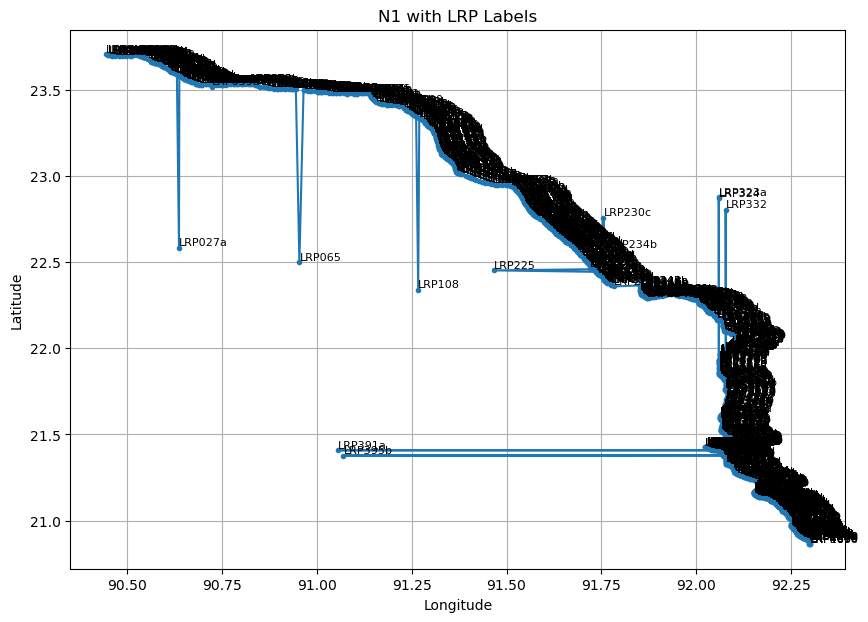

In [16]:
plot_road_with_labels(tidy_new, title="N1 with LRP Labels", road_name="N1")

In [17]:
idx = tidy_df.index[tidy_df["lrp"] == target][0]
subset = tidy_df.iloc[max(idx-2, 0): idx+3]
idx2 = tidy_new.index[tidy_new["lrp"] == target][0]
subset2 = tidy_new.iloc[max(idx-2, 0): idx+3]
subset

,road,lrp,lat,lon
791,N1,LRP323,21.879416,92.059083
792,N1,LRP323a,22.874916,92.059111
793,N1,LRP324,22.870499,92.059139
794,N1,LRP324a,21.862500,92.059500
795,N1,LRP325,21.861639,92.059611


In [18]:
subset2

,road,lrp,lat,lon
791,N1,LRP323,21.879416,92.059083
792,N1,LRP323a,22.874916,92.059111
793,N1,LRP324,22.870499,92.059113
794,N1,LRP324a,21.862500,92.059500
795,N1,LRP325,21.861639,92.059611


### Function to correct multiple LRPs with predefined list

In [19]:
def correct_multiple_lrps(df, lrp_list):
    corrected_df = df.copy()
    #logs = []

    for lrp in lrp_list:
        corrected_df = correct_lrp_position(corrected_df, lrp)
        #logs.append(log)

    #log_df = pd.DataFrame(logs)
    return corrected_df


In [20]:
lrps = [
    "LRP027a",
    "LRP065",
    "LRP108",
    "LRP225",
    "LRP230c",
    "LRP234b",
    "LRP323a",
    "LRP324",
    "LRP332",
    "LRP391a",
    "LRP395b"
] #to be auto generated based on identification algorithm
tidy_new2 = correct_multiple_lrps(tidy_df, lrps)


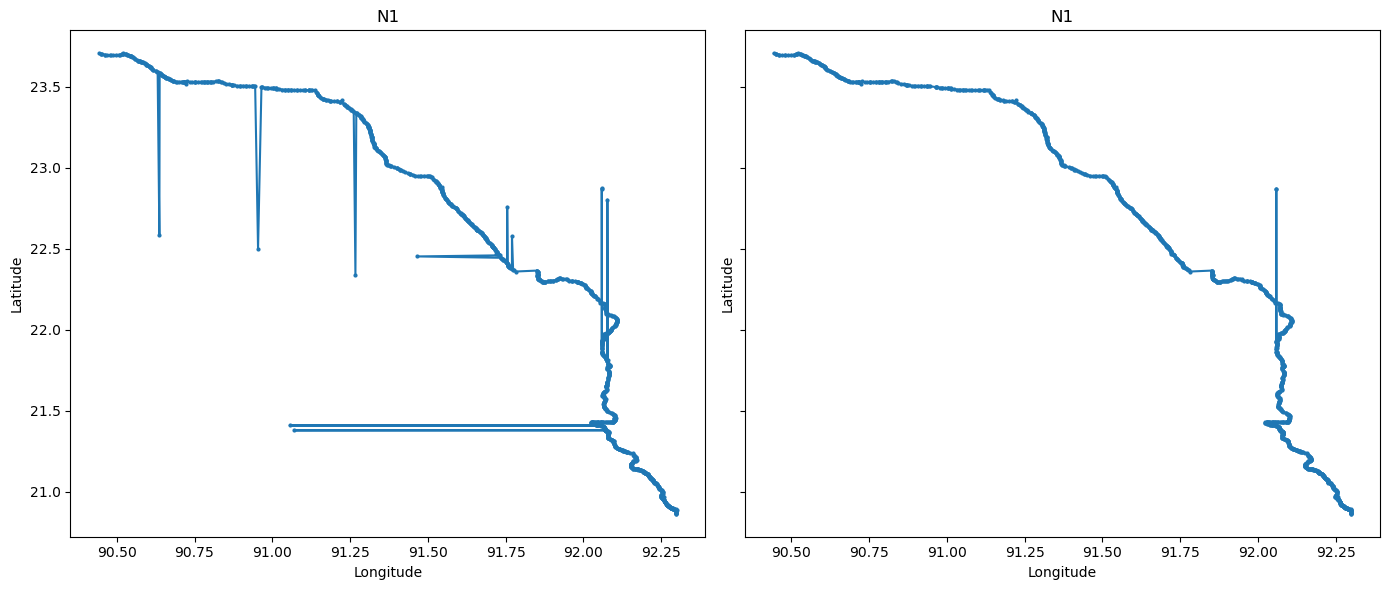

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)

plot_road(tidy_df, title=tidy_df["road"].iloc[0], ax=axes[0])
plot_road(tidy_new2, title=tidy_new2["road"].iloc[0], ax=axes[1])
plt.tight_layout()
plt.show()

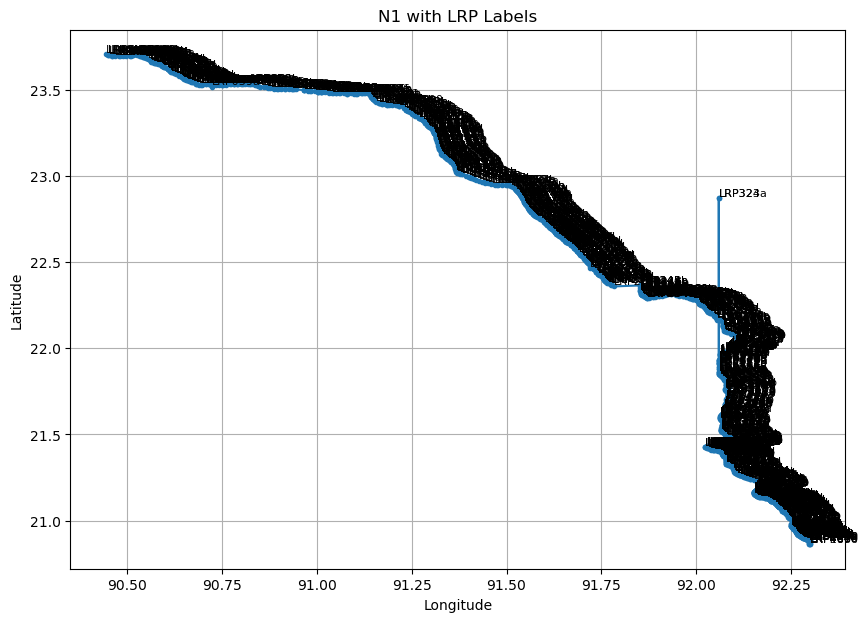

In [22]:
plot_road_with_labels(tidy_new2, title="N1 with LRP Labels", road_name="N1")

In [23]:
subset

,road,lrp,lat,lon
791,N1,LRP323,21.879416,92.059083
792,N1,LRP323a,22.874916,92.059111
793,N1,LRP324,22.870499,92.059139
794,N1,LRP324a,21.862500,92.059500
795,N1,LRP325,21.861639,92.059611


In [24]:
idx3 = tidy_new2.index[tidy_new2["lrp"] == target][0]
subset3 = tidy_new2.iloc[max(idx3-2, 0): idx3+3]
subset3

,road,lrp,lat,lon
791,N1,LRP323,21.879416,92.059083
792,N1,LRP323a,22.870499,92.059139
793,N1,LRP324,22.870499,92.059139
794,N1,LRP324a,21.862500,92.059500
795,N1,LRP325,21.861639,92.059611


In [ ]:
EARTH_RADIUS_M = 6371008.8  # meters

def haversine_m(lat1, lon1, lat2, lon2):
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return EARTH_RADIUS_M * c

#calculate distance from each point
def add_seg_dist_m(df, road_col="road", lat_col="lat", lon_col="lon", order_col=None):
    d = df.copy()

    # ensure numeric
    d[lat_col] = pd.to_numeric(d[lat_col], errors="coerce")
    d[lon_col] = pd.to_numeric(d[lon_col], errors="coerce")

    # sort per road (use lrp_order if you have it)
    sort_cols = [road_col]
    if order_col and order_col in d.columns:
        sort_cols.append(order_col)
    d = d.sort_values(sort_cols).reset_index(drop=True)

    # previous coords within each road
    lat_prev = d.groupby(road_col)[lat_col].shift(1)
    lon_prev = d.groupby(road_col)[lon_col].shift(1)

    # compute seg distance
    d["seg_dist_m"] = haversine_m(lat_prev, lon_prev, d[lat_col], d[lon_col])

    # first point per road has no previous point
    d.loc[lat_prev.isna() | lon_prev.isna() | d[lat_col].isna() | d[lon_col].isna(), "seg_dist_m"] = np.nan

    return d


In [ ]:
tidy_scored = add_seg_dist_m(tidy_df)

In [ ]:
tidy_scored.sort_values("seg_dist_m", ascending=False).head()

In [ ]:
tidy_scored.loc[tidy_scored['lrp']=='LRP225']

In [ ]:
tidy_scored.describe()

In [ ]:
Q1 = tidy_scored["seg_dist_m"].quantile(0.25)
Q3 = tidy_scored["seg_dist_m"].quantile(0.75)
IQR = Q3 - Q1

threshold = Q3 + 1.5 * IQR
print("IQR Threshold:", threshold)

tidy_scored["is_outlier_iqr"] = tidy_scored["seg_dist_m"] > threshold


In [ ]:
tidy_scored.loc[tidy_scored['is_outlier_iqr']==True]

In [ ]:
import numpy as np
import pandas as pd

EARTH_RADIUS_M = 6371008.8

def haversine_m(lat1, lon1, lat2, lon2):
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return EARTH_RADIUS_M * c

def interpolate_outliers_to_neighbors(
    tidy_scored: pd.DataFrame,
    outlier_col: str = "is_outlier_iqr",
    road_col: str = "road",
    lat_col: str = "lat",
    lon_col: str = "lon",
    order_col: str | None = "lrp_order",
):
    """
    Steps:
    1) identify outliers via outlier_col
    2) interpolate lat/lon from previous and next points within each road
    3) write corrected coords into new columns in tidy_new (lat_new, lon_new)
    4) log correction distance and deltas

    Returns:
      tidy_new: full dataframe with corrected coordinates + logs
      corrections_log: dataframe of only corrected rows
    """

    d = tidy_scored.copy()

    # Make sure numeric
    d[lat_col] = pd.to_numeric(d[lat_col], errors="coerce")
    d[lon_col] = pd.to_numeric(d[lon_col], errors="coerce")

    # Sort in road order
    sort_cols = [road_col]
    if order_col and order_col in d.columns:
        sort_cols.append(order_col)
    d = d.sort_values(sort_cols).reset_index(drop=True)

    # Neighbor coordinates
    d["lat_prev"] = d.groupby(road_col)[lat_col].shift(1)
    d["lon_prev"] = d.groupby(road_col)[lon_col].shift(1)
    d["lat_next"] = d.groupby(road_col)[lat_col].shift(-1)
    d["lon_next"] = d.groupby(road_col)[lon_col].shift(-1)

    # Interpolated coords (midpoint)
    d["lat_interp"] = (d["lat_prev"] + d["lat_next"]) / 2.0
    d["lon_interp"] = (d["lon_prev"] + d["lon_next"]) / 2.0

    # Only possible if both neighbors exist
    has_neighbors = d["lat_prev"].notna() & d["lon_prev"].notna() & d["lat_next"].notna() & d["lon_next"].notna()

    # Decide which rows we will correct
    to_fix = d[outlier_col].fillna(False) & has_neighbors & d[lat_col].notna() & d[lon_col].notna()

    # Create new corrected columns (default = original)
    d["lat_new"] = d[lat_col]
    d["lon_new"] = d[lon_col]

    # Apply correction
    d.loc[to_fix, "lat_new"] = d.loc[to_fix, "lat_interp"]
    d.loc[to_fix, "lon_new"] = d.loc[to_fix, "lon_interp"]

    # Logging: deltas (degrees)
    d["lat_delta"] = d["lat_new"] - d[lat_col]
    d["lon_delta"] = d["lon_new"] - d[lon_col]

    # Logging: movement distance (meters)
    d["move_dist_m"] = haversine_m(d[lat_col], d[lon_col], d["lat_new"], d["lon_new"])
    d.loc[~to_fix, "move_dist_m"] = 0.0  # not corrected -> 0

    # Optional: recompute segment distances AFTER correction (use corrected coords)
    d["lat_new_prev"] = d.groupby(road_col)["lat_new"].shift(1)
    d["lon_new_prev"] = d.groupby(road_col)["lon_new"].shift(1)

    d["seg_dist_m_new"] = haversine_m(d["lat_new_prev"], d["lon_new_prev"], d["lat_new"], d["lon_new"])
    d.loc[d["lat_new_prev"].isna() | d["lon_new_prev"].isna(), "seg_dist_m_new"] = np.nan

    # Create a compact corrections log
    cols_for_log = [
        road_col,
        "lrp" if "lrp" in d.columns else None,
        order_col if order_col in d.columns else None,
        lat_col, lon_col,
        "lat_new", "lon_new",
        "lat_delta", "lon_delta",
        "move_dist_m",
        "seg_dist_m" if "seg_dist_m" in d.columns else None,
        "seg_dist_m_new",
        outlier_col
    ]
    cols_for_log = [c for c in cols_for_log if c is not None]

    corrections_log = d.loc[to_fix, cols_for_log].copy()

    # This is your tidy_new (keep original columns + new columns)
    tidy_new = d.copy()

    return tidy_new, corrections_log


In [ ]:
tidy_new, corrections_log = interpolate_outliers_to_neighbors(
    tidy_scored,
    outlier_col="is_outlier_iqr",
    order_col="lrp_order" if "lrp_order" in tidy_scored.columns else None
)


In [ ]:
plot_road(tidy_df, title=tidy_df['road'][0])

In [ ]:
plot_road(tidy_new, title=tidy_new['road'][0])

In [ ]:
corrections_log.head()

In [ ]:
corrections_log.loc[corrections_log['lrp']=='LRP027a']

---

In [ ]:
bmms = pd.read_excel('infrastructure/BMMS_overview.xlsx', sheet_name='BMMS_overview')
bmms.head()

In [ ]:
bmms2=bmms.copy()

In [ ]:
bmms3=bmms2.loc[bmms2['road']=='N1']

In [ ]:
bmms3=bmms3[['LRPName','lat','lon']]

In [ ]:
bmms3.describe()

In [ ]:
bmms3.iloc[0]

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [ ]:
titik1=